# Clase 3: Continuación Matplotlib

En esta clase vamos a continuar el proceso de graficar utilizando matplotlib, principalmente: 

- El manejo de los diagramas de cajas y bigotes (Boxplots)
- Trabajar con subgráficos 
- Graficar con la orientación a objetos de matplotlib
- Calculo de estadísticas con pandas
- Manejo de anotaciones y uso de los colores con matplotlib

Comenzamos importando las librerías que vamos a utilizar:


In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

%matplotlib inline 

Para hacer las visualizaciones, utilizaremos el set de datos de las flores de Iris.

In [2]:
iris_path = "http://srodriguez.me/Datasets/Iris.csv"
iris_df = pd.read_csv(iris_path)
iris_df.sample(5)

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
85,86,6.0,3.4,4.5,1.6,Iris-versicolor
22,23,4.6,3.6,1.0,0.2,Iris-setosa
103,104,6.3,2.9,5.6,1.8,Iris-virginica
33,34,5.5,4.2,1.4,0.2,Iris-setosa
81,82,5.5,2.4,3.7,1.0,Iris-versicolor


# Diagramas de Caja y Bigotes (Box Plots)

El diagrama de Caja y Bigotes es una representación univariada de los datos, utilizando múltiples componentes para poder mostrar la variabilidad y asimetría de los datos. El componente principal corresponde a la caja, compuesta por un rectángulo el cual los limites corresponden a el primer cuartil y tercer cuartil. Adentro de dicho rectángulo se presenta una línea la cual corresponde a la mediana. El otro componente corresponde a los bigotes, los cuales se extienden hasta una distancia de $1.5IQR$, donde $IQR$ corresponde al rango intercuartil y se calcula: $IQR=Q_3 - Q_1$. Finalmente, cualquier valor que supere la distancia de los bigotes, corresponden a nuestros datos atípicos, los cuales se marcan como puntos después de los bigotes.

Si nosotros quisiésemos graficar manualmente un diagrama de caja y bigote, deberíamos calcular cada elemento mencionado anteriormente para poder dibujarlo en papel y lápiz. Una de las grandes ventajas de utilizar matplotlib, es que cada uno de estos valores los calcula internamente y luego los utiliza para poder graficar cada elemento. Para esto utilizamos el método `plt.boxplot`, donde la sintaxis es la siguiente:

```python
plt.boxplot(x,*args)
```

donde `x` puede ser un arreglo unidimensional, o $n$-dimensional (donde se generarán $n$ cajas). 

Un ejemplo de esto utilizando el set de datos de Iris, obtendremos el Box plot de la variable `SepalLengthCm`:


{'whiskers': [<matplotlib.lines.Line2D at 0x7f3a0b826d60>,
 'caps': [<matplotlib.lines.Line2D at 0x7f3a0b842460>,
 'boxes': [<matplotlib.lines.Line2D at 0x7f3a0b826a00>],
 'medians': [<matplotlib.lines.Line2D at 0x7f3a0b842b20>],
 'fliers': [<matplotlib.lines.Line2D at 0x7f3a0b842e80>],
 'means': []}

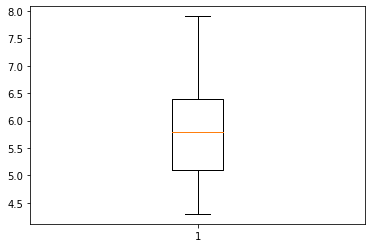

In [3]:
plt.boxplot(iris_df['SepalLengthCm'])


A primera vista podemos ver que la mayoría de los elementos están presentes. Un punto importante a notar sobre como grafica `matplotlib` se puede ver en la respuesta a la ejecución del código sin utilizar en la última línea el método `plt.show()`. En este caso, el método de `boxplot` nos retornar un diccionario, en el cual tienen todos los objetos artistas para cada elemento pintado (esto es útil si quisiésemos modificar específicamente un artista en específico). 

Otro punto importante es la asimetría presente en los bigotes presentes en el ejemplo anterior. Por defecto `matplotlib` al calcular el rango intecuartil revisa los valores máximos y mínimos presentes en los datos a graficar. Si $(Q_3 + 1.5 IQR) > max(X)$ o $(Q_1 - 1.5 IQR) < min(X)$, lo que realizara matplotlib es cortar los bigotes en los valores máximos y mínimos.


Viendo los argumentos de boxplot, una de las primeras modificaciones es que podemos agregar la visualización de la media, para esto utilizamos el parámetro `showmeans`, el cual por defecto viene con valor `False`. En este caso, cambiando dicho valor a `True` mostrara la media como un punto dentro de la caja.

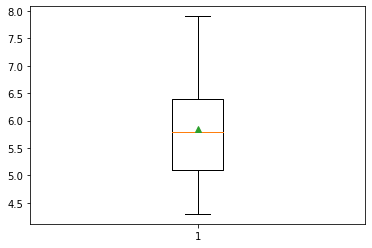

In [4]:
plt.boxplot(iris_df['SepalLengthCm'],showmeans=True)
plt.show()

Para mantener consistencia con el uso de líneas dentro de nuestro boxplot, podemos utilizar el parámetro `meanline` para especificar el tipo de marcador de línea a utilizar.

A modo de ejemplo, la línea de la media se mostrará en color verde:


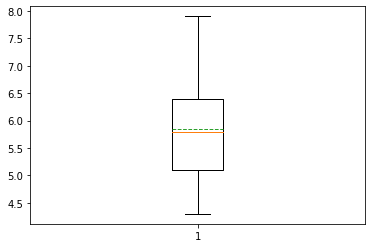

In [5]:
plt.boxplot(iris_df['SepalLengthCm'],showmeans=True, meanline='-')
plt.show()

Utilizando como ejemplo un arreglo bidimensional, graficaremos cada caja y bigote por separado para cada variable. 

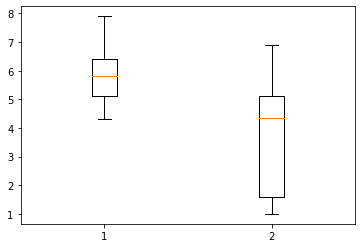

In [6]:
columns_to_plot = [iris_df['SepalLengthCm'],iris_df['PetalLengthCm']]
plt.boxplot(columns_to_plot)

plt.show()

**¿Que pasaría si graficáramos utilizando dos sentencias de boxplot como se muestran a continuación?:**

```python
plt.boxplot(iris_df['SepalLengthCm'])
plt.boxplot(iris_df['PetalLengthCm'])
```


# Trabajando con subgráficos (subplots)

Si bien podríamos generar todos los gráficos que nosotros queramos uno a uno, matplotlib nos ofrece una interfaz para generar subgráficos. En este caso, en la misma área donde podemos generar un gráfico, podemos seccionarlo en $n$ subgráficos que queramos. Para esto, utilizaremos el método `plt.subplots`, el cual nos retornara dos elementos los cuales llamaremos `fig` y `ax`. El primer elemento corresponde a un objeto [Figure](https://matplotlib.org/api/_as_gen/matplotlib.figure.Figure.html#matplotlib.figure.Figure) de matplotlib, y el segundo elemento corresponde a una lista de objetos [Axes](https://matplotlib.org/api/axes_api.html?highlight=axes#module-matplotlib.axes). Este último, nos servirá para poder realizar los graficar en cada una de las secciones que automáticamente matplotlib separa. 

Los parámetros de entrada para el método `plt.subplots(filas, columnas, figsize=(width,height))`, y tal como detallan: determinan el número de filas, columnas y el tamaño de la figura respectivamente. Algo importante a tener en cuenta es:

- Si uno utiliza `plt.subplots(1,1)`, el objeto `ax` corresponderá a **una** instancia del objeto `Axes`. 
- Si uno definiera `plt.subplots(n,1)` o `plt.subplots(1,n)`, el objeto `ax` correspondería a una **lista unidimensional** de objetos `Axes`. 
- Finalmente si definiéramos `plt.subplots(n,m)`, `ax` seria ahora un **arreglo bidimensional** con $n$ filas y $m$ columnas. 

Utilizando la interfaz de objetos de matplotlib, procederemos a graficar un histograma de la variable `SepalLengthCm` de iris_df y un Boxplot asociado a la misma variable.


[<AxesSubplot:> <AxesSubplot:>]


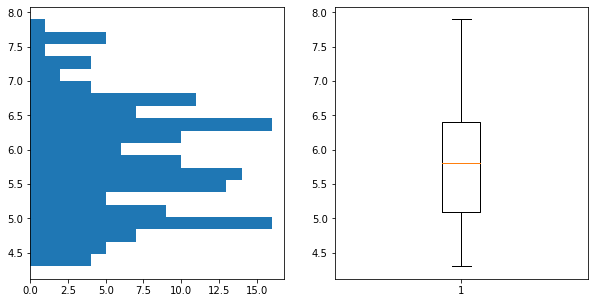

In [7]:
fig,ax = plt.subplots(1,2,figsize=(10,5)) #Definiremos 1 fila y 2 columnas
print(ax) #Imprimiremos la lista obtenida de ax

ax[0].hist(iris_df['SepalLengthCm'],orientation='horizontal',bins=20) #Accederemos al primer Axis y pintaremos un histograma en dicho Axis
ax[1].boxplot(iris_df['SepalLengthCm']) #Accederemos al segundo Axis y graficaremos un boxplot

plt.show()

Un ejemplo de cómo acceder a cada `Axis` cuando generamos subgráficos con 2 filas y 2 columnas:

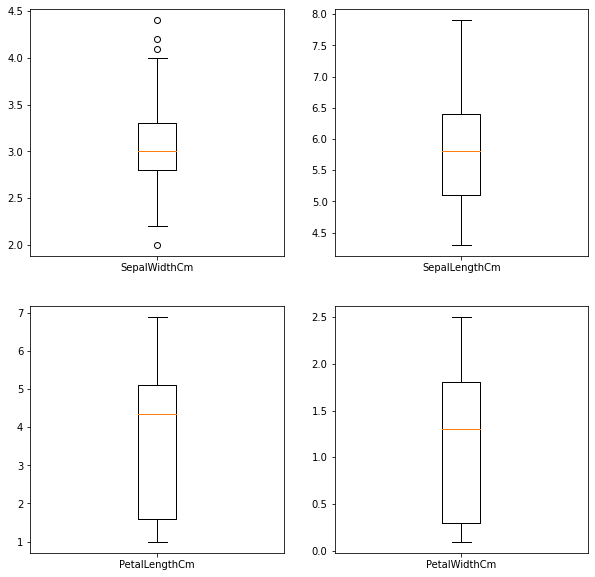

In [8]:
fig,ax = plt.subplots(2,2,figsize=(10,10)) #generamos 4 subgraficos (2 filas y 2 columnas)

#Primera Fila, Primera Columna
ax[0,0].boxplot(iris_df['SepalWidthCm']) #Generamos el boxplot para la variable SepalWidthCm
ax[0,0].set_xticklabels(["SepalWidthCm"]) #utilizamos el método set_xticklabels, para añadir el nombre de la variable en el eje X

#Primera Fila, Segunda Columna
ax[0,1].boxplot(iris_df['SepalLengthCm'])
ax[0,1].set_xticklabels(["SepalLengthCm"])

#Segunda Fila, Primera Columna
ax[1,0].boxplot(iris_df['PetalLengthCm'])
ax[1,0].set_xticklabels(["PetalLengthCm"])

#Segunda Fila, Segunda Columna
ax[1,1].boxplot(iris_df['PetalWidthCm'])
ax[1,1].set_xticklabels(["PetalWidthCm"])

plt.show()

Una forma alternativa utilizando la interfaz funcional (pyplot), para la generación de subgraficos corresponden al uso del metodo `subplot`

[Documentación plt.subplot](https://matplotlib.org/3.1.0/api/_as_gen/matplotlib.pyplot.subplot.html?highlight=pyplot%20subplot#matplotlib.pyplot.subplot)

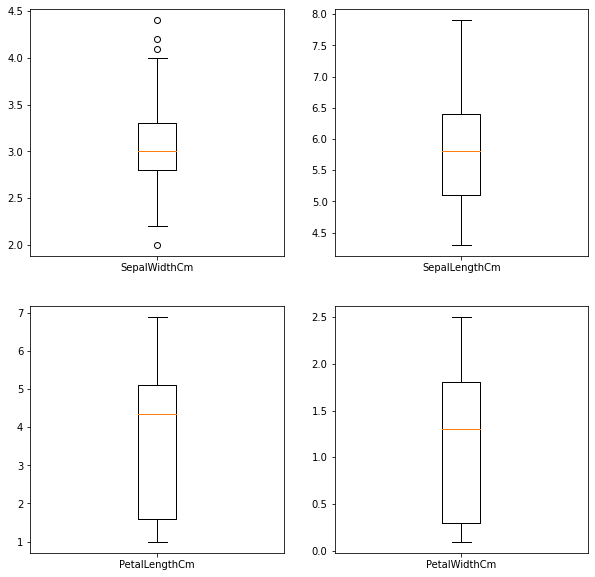

In [9]:
plt.figure(figsize=(10,10))
plt.subplot(221) #2 filas, 2 columnas, subfigura 1
plt.boxplot(iris_df['SepalWidthCm'])
plt.xticks(ticks=[1],labels=["SepalWidthCm"])

plt.subplot(222) #2 filas, 2 columnas, subfigura 2
plt.boxplot(iris_df['SepalLengthCm'])
plt.xticks(ticks=[1],labels=["SepalLengthCm"])

plt.subplot(223)#2 filas, 2 columnas, subfigura 3
plt.boxplot(iris_df['PetalLengthCm'])
plt.xticks(ticks=[1],labels=["PetalLengthCm"])

plt.subplot(224)#2 filas, 2 columnas, subfigura 4
plt.boxplot(iris_df['PetalWidthCm'])
plt.xticks(ticks=[1],labels=["PetalWidthCm"])

plt.show()

# Estadísticas utilizando pandas y numpy
Una forma rápida para poder obtener las estadísticas de centralidad y variabilidad, es utilizando el método `.describe()`. Este generara dichas múltiples estadísticas para cada una de las columnas **numéricas** presente en un DataFrame. Las estadísticas que muestra son: 

- count: el número de elementos **no nulos** existentes en la columna
- mean: la media asociada a la columna
- std: la desviación estándar asociada a la columna
- min: valor mínimo presente en la columna
- 25%: primer cuartil $(Q_1)$
- 50%: segundo cuartil $(Q_2)$, (la mediana)
- 75%: tercer cuartil $(Q_3)$
- max: valor máximo presente en la columna


In [10]:
iris_df.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


Para datos categóricos, se puede utilizar el parámetro `include=['object']` para obtener estadísticas tales como:
    
- count: Cantidad de elementos no nulos
- unique: Cantidad de valores únicos presentes en la columna
- top: Ejemplo del valor único con mayor cantidad de elementos en la columna
- freq: el total de elementos presentes en la columna, con respecto al valor obtenido en top


In [11]:
iris_df.describe(include=["object"])

,Species
count,150
unique,3
top,Iris-versicolor
freq,50


Con un DataFrame, podemos utilizar el método `.mean()` para obtener la media de cada una de las variables. Para cada una de las estadísticas mencionadas anteriormente, existe métodos para cada una de las estadísticas. [Métodos asociados a estadisticas](https://pandas.pydata.org/pandas-docs/stable/user_guide/computation.html#method-summary)

In [12]:
iris_df.mean() # Media para cada columna

Id               75.500000
SepalLengthCm     5.843333
SepalWidthCm      3.054000
PetalLengthCm     3.758667
PetalWidthCm      1.198667
dtype: float64

También podemos especificar las columnas las cuales se calcularán las estadísticas

In [13]:
columns = ['SepalLengthCm', 'SepalWidthCm']
iris_df[columns].mean()

SepalLengthCm    5.843333
SepalWidthCm     3.054000
dtype: float64

Solo por *sanity check*, comprobamos que el método de numpy da el mismo resultado que el implementado en pandas

In [14]:
iris_df['SepalLengthCm'].mean(), np.mean(iris_df['SepalLengthCm']) # Media para la columna 'SepalLengthCm'

(5.843333333333334, 5.843333333333334)

Ejemplo de cómo obtener $Q_1$, $Q_2$ y $Q_3$ uno a uno:

In [15]:
print(iris_df['SepalLengthCm'].quantile(0.25),iris_df['SepalLengthCm'].quantile(0.5), iris_df['SepalLengthCm'].quantile(0.75))

5.1 5.8 6.4


O en su defecto, al método `.quantile`, dar como parámetro de entrada una lista con los cuantiles que queremos:

In [16]:
iris_df['SepalLengthCm'].quantile([0.25,0.5,0.75])

0.25    5.1
0.50    5.8
0.75    6.4
Name: SepalLengthCm, dtype: float64

# Manejo de anotaciones

Anteriormente (en la clase 2), habíamos visto el uso del método `plt.text` para poder colocar texto en nuestras visualizaciones. Existe otro método, que da una mayor flexibilidad al momento de hacer nuestras anotaciones, incorporando el uso de flechas y otros efectos los cuales se detallan en el siguiente enlace:

[Tutorial de anotaciones](https://matplotlib.org/3.1.1/tutorials/text/annotations.html)

Para hacer el uso del método de anotación se definen como mínimo dos parámetros: `s` (el string a mostrar) y `xy`, par de coordenadas del gráfico con los valores $x$ e $y$. A modo de ejemplo, vamos a ver el uso de `plt.annotate`:


<ipython-input-28-43870645e229>:7: MatplotlibDeprecationWarning: The 's' parameter of annotate() has been renamed 'text' since Matplotlib 3.3; support for the old name will be dropped two minor releases later.
  plt.annotate(s = "5.8", xy = xy) #generamos la anotación, con s="5.8" (el valor de la mediana), y las coordenadas xy


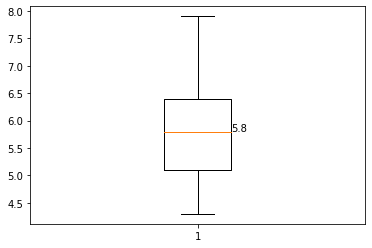

In [28]:
width = 0.2 #Vamos a definir un valor de ancho para el boxplot que vamos a graficar

#Sabiendo que por defecto, matplotlib deja en el valor de x=1 el primer boxplot, vamos a generar la anotación en el eje x (1 + width/2), y en el eje y, el valor de la mediana
xy = (1 + width/2 , 5.8) #Guardamos este par en una tupla con el nombre de xy

plt.boxplot(iris_df['SepalLengthCm'],widths=width) # Graficamos nuestro boxplot (con ancho=width)
plt.annotate(s = "5.8", xy = xy) #generamos la anotación, con s="5.8" (el valor de la mediana), y las coordenadas xy

plt.show()

Cabe destacar que la anotación tiene un punto de partida el cual nosotros detallamos con el par `xy`, pero a su vez nosotros podemos modificar las coordenadas de donde mostramos el texto. Esto va a ser útil con una opción que vamos a ver más adelante. En este caso, podemos modificar las coordenadas xy del texto utilizando el parámetro `xytext`:

<ipython-input-18-28a9f6100cb7>:8: MatplotlibDeprecationWarning: The 's' parameter of annotate() has been renamed 'text' since Matplotlib 3.3; support for the old name will be dropped two minor releases later.
  plt.annotate(s = "5.8", xy = xy,


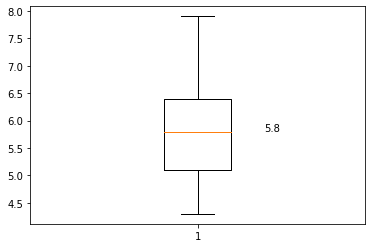

In [18]:
width = 0.2
xy = (1 + width/2 , 5.8)

xytext = (1 + width ,5.8) #Movemos las coordenadas XY del texto correspondiente al ancho del boxplot.

plt.boxplot(iris_df['SepalLengthCm'], widths=width)

plt.annotate(s = "5.8", xy = xy, 
             xytext = xytext) # Añadimos las nuevas coordenadas para el texto
plt.show()

A su vez, podemos definir las coordenadas xy para el texto utilizando coordenadas, o en su defecto, posiciones proporcionales al tamaño del gráfico. En este caso, vamos a utilizar subplots para mostrar las dos formas, coordenadas y proporciones. Para poder detallar una de las dos modalidades tenemos que hacer uso del parámetro `xycoords`, el cual inicializamos en alguno de los dos valores: `"data"` (por defecto) o `"axes fraction"`.

<ipython-input-19-34261a165ba4>:11: MatplotlibDeprecationWarning: The 's' parameter of annotate() has been renamed 'text' since Matplotlib 3.3; support for the old name will be dropped two minor releases later.
  plt.annotate(s = "5.8", xy = xy,
<ipython-input-19-34261a165ba4>:19: MatplotlibDeprecationWarning: The 's' parameter of annotate() has been renamed 'text' since Matplotlib 3.3; support for the old name will be dropped two minor releases later.
  plt.annotate(s = "5.8", xy = xy,


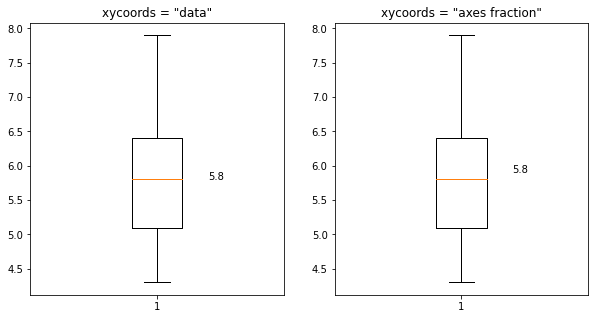

In [19]:
width = 0.2

#para xycoords="data", no tenemos que cambiar nada de como lo hemos estado haciendo
xy = (1 + width/2 , 5.8)
xytext = (1 + width ,5.8) #Movemos las coordenadas XY del texto

plt.figure(figsize=(10,5)) #definimos una nueva figura de width=10, height=5
plt.subplot(121) # Trabajamos con el primer subplot
xycoords="data" #definimos xycoords= "data" y realizamos la misma operacion como anteriormente lo habiamos hecho
plt.boxplot(iris_df['SepalLengthCm'],widths=width)
plt.annotate(s = "5.8", xy = xy, 
             xytext = xytext, xycoords = xycoords)
plt.title('xycoords = "data"')

plt.subplot(122) # El subplot 2, las coordenadas xy se van a generar con "axes fraction"
xytext = (0.7 ,0.45) #Ideal entre x,y \in [0,1], en este caso cambiamos los valores en proporciones con respecto a la figura (0.7 del eje X y 0.45 del eje Y)
xycoords="axes fraction" #Reemplazamos el valor de xycoords
plt.boxplot(iris_df['SepalLengthCm'],widths=width)
plt.annotate(s = "5.8", xy = xy, 
             xytext = xytext, xycoords = xycoords)
plt.title('xycoords = "axes fraction"')

plt.show()

Finalmente, vamos a retomar el por qué podemos definir un inicio de la anotación con las coordenadas xy, para luego separar el texto con xytext. La idea, es que ahora nosotros podemos agregar flechas las cuales nos permiten resaltar de mejor manera lo que nosotros queremos anotar. Para esto, necesitamos definir un diccionario el cual le vamos a llamar `arrowprops`, y contiene las siguientes keys/values: 

- arrowstyle: '->' Queremos un estilo de flecha tradicional
- connectionstyle: 'arc3' Queremos que, desde el texto hacia el inicio de la anotación, se genere con una línea recta

Mas posibles valores para estos dos keys, la pueden ver en el [Tutorial](https://matplotlib.org/3.1.1/tutorials/text/annotations.html#annotating-with-arrow) de las anotaciones. Finalmente, nosotros añadimos al método `annotate`, el nuevo diccionario utilizando el parámetro `arrowprops`. El ejemplo se ve a continuación:


<ipython-input-20-b0db23f0abb8>:12: MatplotlibDeprecationWarning: The 's' parameter of annotate() has been renamed 'text' since Matplotlib 3.3; support for the old name will be dropped two minor releases later.
  ax.annotate(s = "5.8 \nMediana", xy = xy, #Fijenese aca que en el texto se inserto un salto de linea (\n) el cual se va a ver reflejado en el gráfico


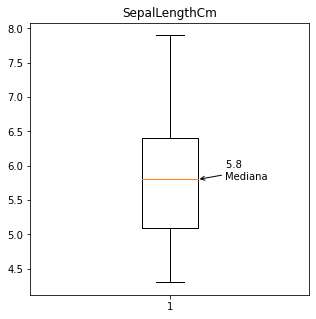

In [20]:
width = 0.2
xy = (1 + width/2 , 5.8)
xytext = (1 + width , 5.8) #Movemos las coordenadas XY del texto
xycoords="data"

arrowprops = dict(arrowstyle="->",connectionstyle="arc3") #Añadimos el diccionario utilizando la funcion de construccion dict

fig , ax = plt.subplots(1,1,figsize=(5,5)) #definimos un subplot de fila 1, columna 1 y detallamos su largo ancho

ax.boxplot(iris_df['SepalLengthCm'],widths=width) #Pintamos nuestro boxplot

ax.annotate(s = "5.8 \nMediana", xy = xy, #Fijenese aca que en el texto se inserto un salto de linea (\n) el cual se va a ver reflejado en el gráfico
             xytext = xytext, xycoords = xycoords, arrowprops = arrowprops)

ax.set_title("SepalLengthCm")
plt.show()

# Dinámica 1

Generar dos gráficos de cajas y bigotes (idealmente con subplots). El primero debe ser la variable "SepalWidthCm" y el segundo una variable de su elección. Además de esto, debe realizar anotaciones para cada uno de los siguientes elementos: 

- Mediana
- Media
- Primer Cuartil
- Tercer Cuartil
- Outliers

**Nota:** Pueden alternar las posiciones X de las anotaciones para que los gráficos no se vean cargados hacia un lado. 

**Nota 2:** Como desafío, pueden generar una función la cual reciba como parámetros los diversos elementos que forman una anotación. Esto lo pueden realizar para mejorar la legibilidad de su código.


[Text(1, 0, 'Petal Width [Cm]')]

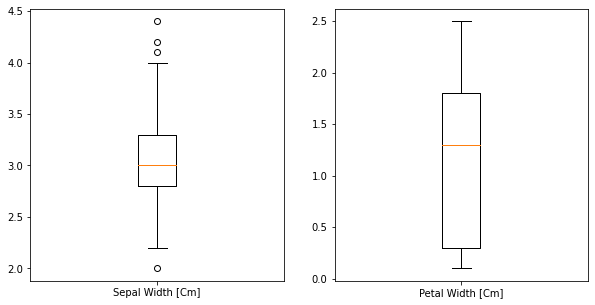

In [40]:
#Su codigo aqui

fig, ax = plt.subplots(1,2, figsize=(10,5))

ax[0].boxplot(iris_df['SepalWidthCm']) 
ax[1].boxplot(iris_df['PetalWidthCm'])

ax[0].set_xticklabels(['Sepal Width [Cm]'])
ax[1].set_xticklabels(['Petal Width [Cm]'])

# Fin Dinámica 1

# Manejo de colores 

Un punto más a personalizar de nuestros gráficos, corresponden al uso de colores en las marcas/líneas dentro de nuestras visualizaciones. Ya vimos en la clase pasada, el cómo cambiar el color desde la especificación del marcador. Ahora vamos a ver como cambiarlo utilizando el parámetro `color`

En primer lugar, generemos un diagrama de dispersión entre `iris_df['PetalWidthCm']` y `iris_df['PetalLengthCm']`:


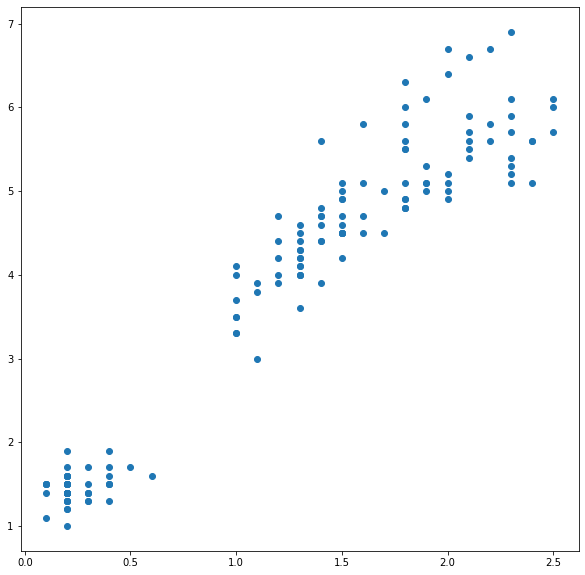

In [22]:
fig, ax = plt.subplots(1,1,figsize=(10,10))

ax.scatter(iris_df['PetalWidthCm'], iris_df['PetalLengthCm'])
plt.show()

Acá estamos viendo en general la distribución de los puntos donde existe una alta correlación entre las variables. Ahora le pregunta: ¿Cómo podríamos añadirle por color según cada una de las Especies presente en el set de datos?

In [23]:
iris_df['Species'].unique() # Estas son las 3 especies, ordenadas alfabeticamente

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

Para poder añadir el color en nuestros gráficos tal como detallamos anteriormente, hay que utilizar el parámetro color. Si el valor asignado a este parámetro es un único valor, entonces a todos los valores que se están graficando se les asignara dicho color. En el caso que el valor asignado a este parámetro fuese una lista, entonces a cada elemento individual de dicho gráfico se le asignara el color correspondiente en la lista (La restricción de esta forma es utilizar la misma cantidad de colores, como elementos que se están graficando). 

Los valores que se les puede asignar al parámetro de color son los siguientes:

- RGB o RGBA utilizando una tupla de valores entre $[0,1]$, Para RGB son 3 valores (Red, Green, Blue) y para RGBA son 4 valores (Red, Green, Blue, Alpha). ej: (0.2,0.5,0.1) o (0.3,0.5,0.7,0.3)
- String de RGB o RGBA en formato Hexadecimal. Ej: `"#05AAF0"` o `"#05AAF0FF"`
- Un String representando un valor numérico de la escala de grises. Ej: `"0.5"`
- Una letra indicando el posible color. Ej: `"r"` para rojo, `"b"` para azul, `"k"` para negro, etc.
- Un nombre del color de la lista [X11/CSS4](https://en.wikipedia.org/wiki/X11_color_names#Color_name_chart) ej: 'blue', 'red'
- Un nombre del color obtenido de la encuesta realizada por [xkcd](https://c.xkcd.com/random/comic/) para asignarle nombres a unos grupos de colores [Lista de colores](https://xkcd.com/color/rgb/). [Motivación para la encuesta](https://blog.xkcd.com/2010/05/03/color-survey-results/). Para utilizar estos colores, hay que poner como prefijo en el string el texto 'xkcd:'. Ej: 'xkcd:ugly yellow', 'xkcd:almost black', 'xkcd: very pale blue'

[Documentación del uso de colores de Matplotlib](https://matplotlib.org/3.1.0/tutorials/colors/colors.html)


En este caso, nosotros vamos ahora a pintar los puntos dependiendo de la especie. Para esto, vamos a ordenar el dataframe según la columna `Species` alfabéticamente, luego vamos a asignarle un color para cada uno de los puntos asociados a una especie. Como hemos ordenado el dataframe alfabéticamente, los primeros 50 puntos van a corresponder a `Iris Setosa`, los siguiente 50 para `Iris Versicolor` y finalmente los últimos 50 para `Iris Virginica`. 

**Nota:** Podemos asumir el número de muestras para cada una de las especies, debido a que el set de datos de iris es un conjunto balanceado. Para ver otros posibles sets de datos, convendría ver cuáles son el número de muestras para cada variable categórica a pintar. Para esto podríamos ocupar el método `value_counts`, ej: `df['columna'].value_counts()`


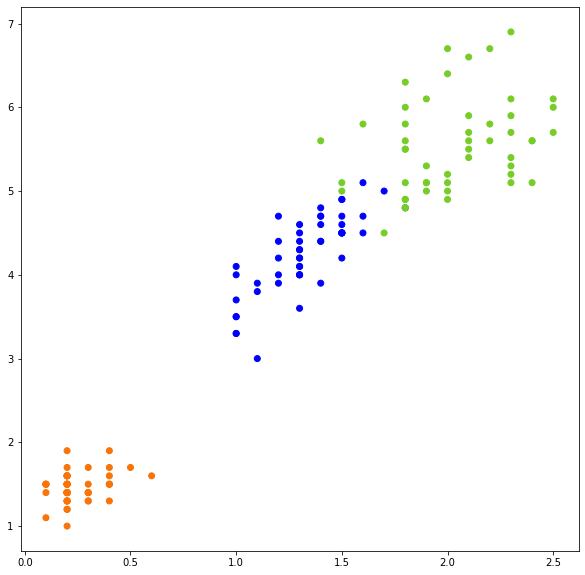

In [24]:
fig, ax = plt.subplots(1,1,figsize=(10,10))

sorted_df = iris_df.sort_values(['Species']) #Vamos a ordenar segun Species nuestro dataframe

# De esta forma, vamos a asignarle el color a cada punto obtenido en la proyeccion de ambas variables
# Generamos una lista, lo multiplicamos por 50 (Repetimos 50 veces los valores de la lista) y finalmente 
# concatenamos todos los colores con el operador +


color1 = ["#f97306"] * 50 # Naranjo en formato RGB Hexadecimal para Iris-Setosa       
color2 = ['Blue'] * 50 # Azul en formato X11/CSS4 para Iris-Versicolor
color3 = ['xkcd:apple green'] * 50 # "Verde manzana" en formato xkcd para Iris-Virginica

color_final = color1 + color2 + color3 # Generamos los colores para cada punto
ax.scatter(iris_df['PetalWidthCm'], iris_df['PetalLengthCm'],color=color_final) # Ocupamos el parametro color para asignar los colores

plt.show()

Una forma alternativa, seria separar el dataframe para cada una de las especies y luego utilizar el método `plot` (o en este caso scatter) para cada uno de estas nuevas secciones.

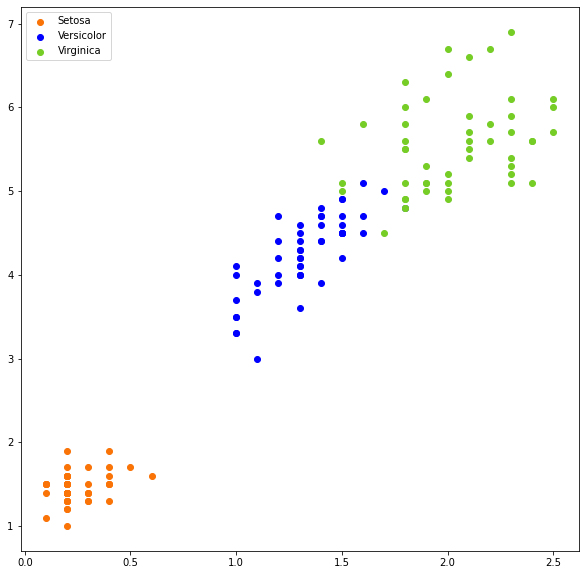

In [25]:
fig, ax = plt.subplots(1,1,figsize=(10,10))

sorted_df = iris_df.sort_values(['Species'])# Ordenamos el dataframe por Species

setosa_df = sorted_df.iloc[0:50 , :]  #Generamos una seccion del dataframe para iris setosa
versicolor_df = sorted_df.iloc[50:100 , :] # lo mismo para iris versicolor
virginica_df = sorted_df.iloc[100:150:, :] # y finalmente para iris virginica

color1 = "#f97306" # Naranjo en formato RGB Hexadecimal para Iris-Setosa       
color2 = 'Blue' # Azul en formato X11/CSS4 para Iris-Versicolor
color3 = 'xkcd:apple green' # "Verde manzana" en formato xkcd para Iris-Virginica

ax.scatter(setosa_df['PetalWidthCm'], setosa_df['PetalLengthCm'], color = color1, label='Setosa') #Scatter para Setosa, con solo una instancia del color y el label para setosa
ax.scatter(versicolor_df['PetalWidthCm'], versicolor_df['PetalLengthCm'], color = color2, label='Versicolor')  #Scatter para Versicolor
ax.scatter(virginica_df['PetalWidthCm'], virginica_df['PetalLengthCm'], color = color3, label='Virginica') #Scatter para Virginica

ax.legend() #Añadimos la leyenda, la cual va a respetar los colores utilizados.

plt.show()

# Dinámica 2

Para esta dinámica vamos a utilizar un set de datos de series temporales multivariada, específicamente el set de datos de climatológicos de la ciudad de Delhi, India. Este set de datos contiene 4 variables numéricas las cuales son:

- meantemp: Temperatura promedio de un día
- humidity: Valor de humedad ambiente diario
- wind_speed: Velocidad del viento en Km/h
- meanpressure: Medición de presión atmosférica

Cada fila de este set de datos corresponde a un día, y el rango de fecha se extiende desde 01-enero-2013 y 01-enero-2017 (4 años). Lo que se va a pedir es lo siguiente:

1.- Obtener las estadísticas descriptivas para cada una de las variables. **¿Podemos observar algo interesante en los datos?**

2.- Obtenga la matriz de correlación y grafíquela

3.- Utilizando subgráficos, grafique para cada variable su histograma (de forma horizontal), seguido por su diagrama de caja y bigote. **¿Que podemos observar con respecto a las variables? ¿Qué creen que puede estar pasando?**

4.- Utilizando subgráficos, grafique 4 diagramas de dispersión para distintos pares de variables presentes en los datos.

5.- Utilizando subgráficos, grafique 4 diagramas de línea para cada posible variable del set de datos, utilice distintos colores para diferenciar las variables **¿Que podemos notar con esta representación?**

6.- Si es que existe algún problema con alguna de las variables, utilice el método `ax[n,m].set_ylim((lim_bajo, lim_alto))` para cambiar los valores del eje Y (Como sugerencia, utilice el rango intercuartil y la mediana de dicha variable para fijar los limites)

**Nota:** Los gráficos deberían tener título y si llegasen a requerir, títulos en los ejes. Con respecto a las anotaciones, no es necesario que en cada gráfico estén presentes. Utilícelos a conciencia. 


**Desafíos**

7.- Reemplace los valores problemáticos de la variable. **¿Con que valor o método podríamos modificar estos datos problemáticos?**

8.- Con los datos corregidos, genere nuevamente los gráficos. **¿Ahora hacen mayor sentido los gráficos?**

9.- Genere un gráfico con múltiples líneas con las temperaturas promedio. El color de cada línea, debe estar relacionado al año de dicha medición. (Como ayuda, tienen que extraer el año de la columna date y luego generar una nueva columna con dichos años).


In [26]:
delhi_df = pd.read_csv("http://srodriguez.me/Datasets/DelhiClimate.csv") # Hacemos la lectura de los datos
delhi_df.sample(10) #mostramos 10 datos al azar

,date,meantemp,humidity,wind_speed,meanpressure
131,2013-05-12,29.857143,40.142857,5.828571,1003.714286
33,2013-02-03,18.000000,65.571429,1.857143,1015.285714
1239,2016-05-24,31.526316,53.526316,8.494737,1000.736842
490,2014-05-06,29.571429,51.142857,6.885714,1006.857143
442,2014-03-19,21.750000,57.375000,10.187500,1013.250000
3,2013-01-04,8.666667,71.333333,1.233333,1017.166667
1077,2015-12-14,13.250000,63.625000,7.400000,1017.000000
625,2014-09-18,30.500000,62.375000,6.712500,1003.875000
512,2014-05-28,33.625000,44.500000,3.950000,1001.250000
347,2013-12-14,16.142857,79.000000,0.800000,1012.571429


# Fin Dinámica 2